In [23]:
# import useful libraries
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graph plotting
from sklearn.cluster import KMeans # kmeans


# Libraries
from sklearn import datasets
from random import shuffle
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix


from sklearn import datasets
from random import shuffle
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

import statsmodels.formula.api as sm
import pandas as pd  # to manipulate dataframes, plots, ..
import matplotlib.pyplot as plt
import seaborn as sns # seaborn is an advanced library for visualization
import numpy as np
import scipy as sp
from scipy.stats import pearsonr,spearmanr ##correlation
from scipy.stats import norm
from sklearn import preprocessing
import numpy as np
import pandas as pd
# Libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier

import warnings
warnings.filterwarnings(action='ignore')

# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# to have figures in the current notebook you should add : %matplotlib inline
%matplotlib inline 

In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

# Import Data Fire 

In [24]:
# the code below loads the data  and creating a target variable 
data_fire=pd.read_csv('data/forestfires.csv')

# creating variable 'target' based on the variable 'area'

data_fire.loc[data_fire['area'] <= 0, 'target'] = 0 
data_fire.loc[data_fire['area'] > 0, 'target'] = 1 

data_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.0


In [25]:
data_fire["target"]=data_fire['target'].astype('int')

#  Creating  new variables 

In [26]:
#Grouping the the burn area to get a better understanding
data_fire['area_category'] = pd.cut(data_fire['area'], bins=[0,5, 10, 50, 100, 1100], include_lowest=True, 
                                 labels=['0-5', '5-10', '10-50', '50-100', '>100'])
data_fire.area_category.value_counts()

0-5       366
10-50      71
5-10       56
50-100     13
>100       11
Name: area_category, dtype: int64

In [27]:
#Grouping the temp to get a better understanding
data_fire['temp_category'] = pd.cut(data_fire['temp'], bins=[0,8, 12, 18, 25, 35], include_lowest=True, 
                                 labels=['0-8', '8-12', '12-18', '18-25', '25-35'])
data_fire.temp_category.value_counts()

18-25    240
12-18    145
25-35     65
8-12      42
0-8       25
Name: temp_category, dtype: int64

In [282]:
data_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target,area_category,temp_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,0-5,8-12
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0-5,12-18
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0-5,12-18
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,0-5,8-12
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0-5,8-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1,5-10,25-35
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1,50-100,18-25
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1,10-50,18-25
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0-5,25-35


In [283]:
# you can run the below code to see the first five observations 
data_fire.describe()

######## IMPORTANT NOTE ###############
## notice that the function describe() results statistics only for non-object variables
##

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.522244
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.499989
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [284]:
##In order to check null values in Pandas DataFrame, we use isnull() function 
##this function return dataframe of Boolean values which are True for NaN values.
data_fire.isnull()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target,area_category,temp_category
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [285]:
##Check for missing/null values : return the number of missing values in each column
data_fire.isnull().sum()

X                0
Y                0
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
target           0
area_category    0
temp_category    0
dtype: int64

In [286]:
#print type of variables
data_fire.dtypes

X                   int64
Y                   int64
month              object
day                object
FFMC              float64
DMC               float64
DC                float64
ISI               float64
temp              float64
RH                  int64
wind              float64
rain              float64
area              float64
target              int32
area_category    category
temp_category    category
dtype: object

In [287]:
data_fire['day'].value_counts()


sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [288]:
data_fire['month'].value_counts()


aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [289]:
data_fire['temp'].value_counts() 

17.4    8
19.6    8
15.4    7
20.6    7
23.4    6
       ..
29.6    1
8.7     1
25.7    1
31.0    1
4.8     1
Name: temp, Length: 192, dtype: int64

# A. Statistical analysis and feature engineering

# Univariable analyses  
In this step we start some basic grafical visualisation for some variables. 
Notes about the this part:

# Resume
>> VARIABLE DAY: The most frequent fire day are 'friday', 'saturday' an 'sunday'. We believe it's because of the big circulation of turists and a big quantities of activitives on the parc. We believe its a important variable for the model.
>> VARIABLE MONTH: More incidence during the months aug and sep. It's possibly because of vacations and big circulation in the parc. Also it's 'summer monthes', what means more hot days. What possibly increase temperature, allowing possible fire situations.
> TEMP CATEGORY: We have a big quantities of cases for temperatura between 12 and 18 but the more quantities of cases are grouped in the range of temperature between '18 to 25'.
>> AREA CATEGORY : We have concentration between 0 and 200 and some outliers after 200. maybe should be interesting remove this outliers. but for this analyse we keep all the data set. 





<AxesSubplot:xlabel='day', ylabel='count'>

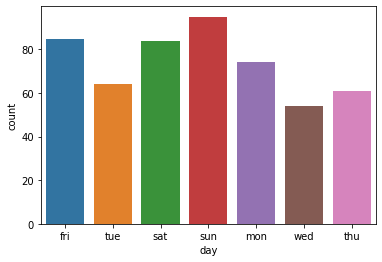

In [290]:
def answer_1():
    # write your code here
    Fig1=sns.countplot(x='day',data=data_fire)
    return Fig1
answer_1()

<AxesSubplot:xlabel='month', ylabel='count'>

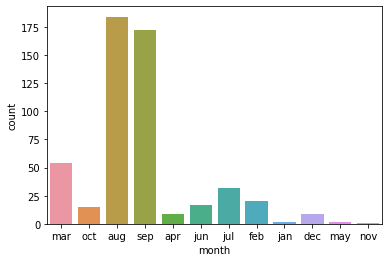

In [291]:
def answer_2():
    # write your code here
    Fig1=sns.countplot(x='month',data=data_fire)
    return Fig1
answer_2()

<AxesSubplot:xlabel='temp_category', ylabel='count'>

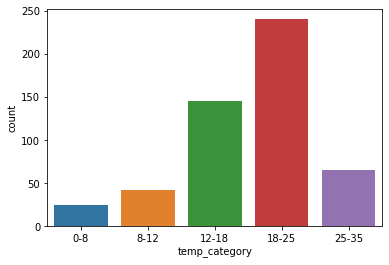

In [292]:
def answer_2():
    # write your code here
    Fig1=sns.countplot(x='temp_category',data=data_fire)
    return Fig1
answer_2()

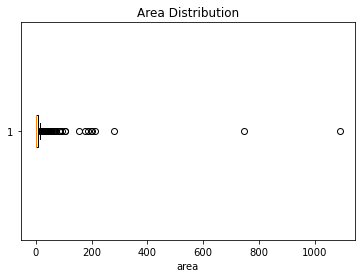

In [293]:
# plot the boxplot of area distribution
plt.boxplot(data_fire.area, vert=False)
plt.title('Area Distribution')
plt.xlabel('area')
plt.show()

#  Changing variables 'month' and 'day' for numeric variables 

In [28]:
cleanup_nums = {"month":     {"jan": 1, "feb": 2, "mar": 3, "apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12},
                "day":     {"sun": 1, "mon": 2, "tue": 3, "wed": 4, "thu": 5, "fri": 6, "sat": 7}} 
data_fire = data_fire.replace(cleanup_nums) #function replace dictionary
data_fire #print the new data set without variable of type object

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target,area_category,temp_category
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,0-5,8-12
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0-5,12-18
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0-5,12-18
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,0-5,8-12
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0-5,8-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1,5-10,25-35
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1,50-100,18-25
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1,10-50,18-25
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0-5,25-35


#  Bivariate analyses:
#  Resume:
He we start to see the correlation between some variables. We decide to check some correlation coeficients between some variables and 'area' , using  "SpearmanrResult"  :

>> NOTES:
>> MONTH x AREA:strong correlation.
>> DAY x AREA:  negative correlation.
>> WIND x AREA: strong correlation.
>> RAIN x AREA: negative correlation.
>> RH x AREA: negetive not so strong correlation.
>> TEMP x AREA: strong correlation.
>> FFMC x AREA: good correlation. not so strong, but good.
>> DMC x AREA: strong correlation.
>> DC x AREA: strong correlation.
>> ICI x AREA: goo correlation.
>> X x AREA:  strong correlation.
>> Y x AREA:  strong correlation 




<AxesSubplot:xlabel='month', ylabel='area'>

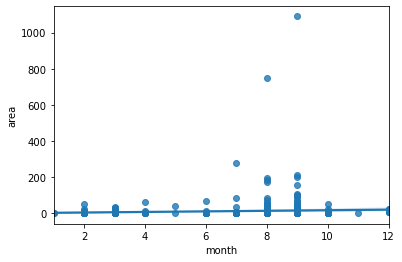

In [297]:
def answer_1(): 
    # write your code here
    ax = sns.regplot(x="month", y="area", data=data_fire)
    return ax
answer_1()

In [120]:
spearmanr(data_fire['area'],data_fire['month'])

SpearmanrResult(correlation=0.11768125056348006, pvalue=0.0073924090421652305)

<AxesSubplot:xlabel='day', ylabel='area'>

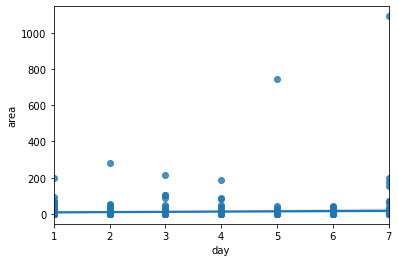

In [121]:
def answer_2(): 
    # write your code here
    ax = sns.regplot(x="day", y="area", data=data_fire)
    return ax
answer_2()

In [122]:
spearmanr(data_fire['area'],data_fire['day'])

SpearmanrResult(correlation=-0.010015372374579109, pvalue=0.8202834977658424)

<AxesSubplot:xlabel='wind', ylabel='area'>

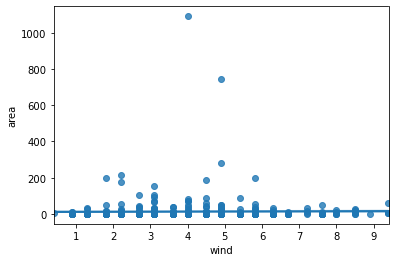

In [21]:
def answer_3(): 
    # write your code here
    ax = sns.regplot(x="wind", y="area", data=data_fire)
    return ax
answer_3()

In [123]:
spearmanr(data_fire['area'],data_fire['wind'])

SpearmanrResult(correlation=0.053195836890654, pvalue=0.2272493270708011)

<AxesSubplot:xlabel='rain', ylabel='area'>

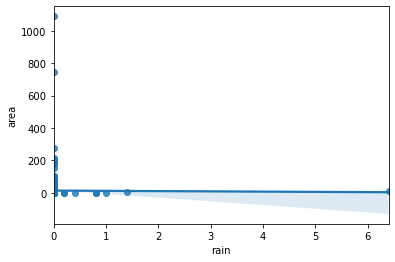

In [124]:
def answer_4(): 
    # write your code here
    ax = sns.regplot(x="rain", y="area", data=data_fire)
    return ax
answer_4()

In [125]:
spearmanr(data_fire['area'],data_fire['rain'])

SpearmanrResult(correlation=-0.06407348244210335, pvalue=0.1457112761459698)

<AxesSubplot:xlabel='RH', ylabel='area'>

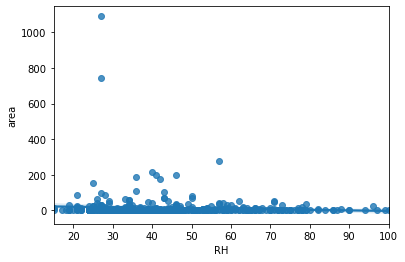

In [126]:
def answer_5(): 
    # write your code here
    ax = sns.regplot(x="RH", y="area", data=data_fire)
    return ax
answer_5()

In [127]:
spearmanr(data_fire['area'],data_fire['RH'])

SpearmanrResult(correlation=-0.024221205598674165, pvalue=0.582675755373232)

<AxesSubplot:xlabel='temp', ylabel='area'>

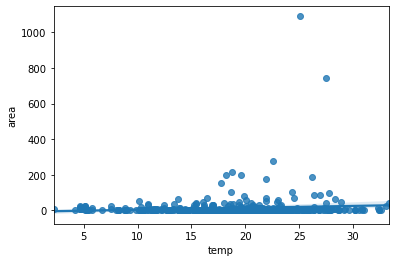

In [128]:
def answer_5(): 
    # write your code here
    ax = sns.regplot(x="temp", y="area", data=data_fire)
    return ax
answer_5()

In [129]:
spearmanr(data_fire['area'],data_fire['temp'])

SpearmanrResult(correlation=0.07869596317636426, pvalue=0.07380790385382502)

<AxesSubplot:xlabel='FFMC', ylabel='area'>

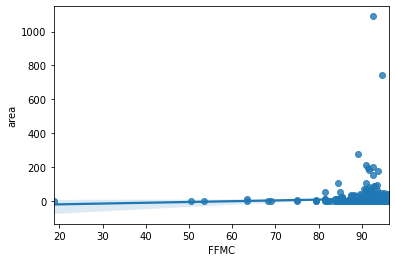

In [130]:
def answer_6(): 
    # write your code here
    ax = sns.regplot(x="FFMC", y="area", data=data_fire)
    return ax
answer_6()

In [131]:
spearmanr(data_fire['area'],data_fire['FFMC'])

SpearmanrResult(correlation=0.025300463142115554, pvalue=0.5659866722104192)

<AxesSubplot:xlabel='DMC', ylabel='area'>

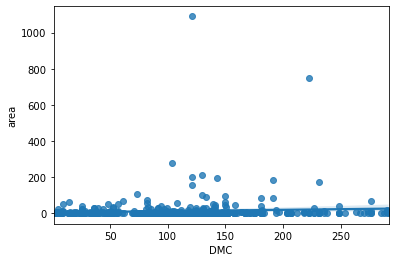

In [132]:
def answer_7(): 
    # write your code here
    ax = sns.regplot(x="DMC", y="area", data=data_fire)
    return ax
answer_7()

In [133]:
spearmanr(data_fire['area'],data_fire['DMC'])

SpearmanrResult(correlation=0.07191967077961155, pvalue=0.1023763382994315)

<AxesSubplot:xlabel='DC', ylabel='area'>

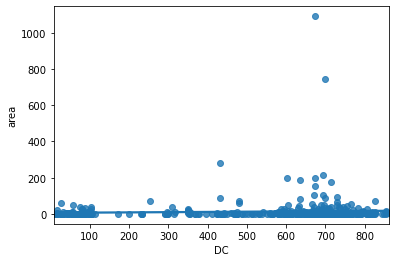

In [134]:
def answer_8(): 
    # write your code here
    ax = sns.regplot(x="DC", y="area", data=data_fire)
    return ax
answer_8()

In [135]:
spearmanr(data_fire['area'],data_fire['DC'])

SpearmanrResult(correlation=0.061633032308869025, pvalue=0.16171468994591626)

<AxesSubplot:xlabel='ISI', ylabel='area'>

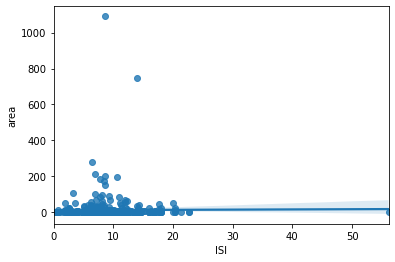

In [136]:
def answer_9(): 
    # write your code here
    ax = sns.regplot(x="ISI", y="area", data=data_fire)
    return ax
answer_9()

In [36]:
spearmanr(data_fire['area'],data_fire['ISI'])

SpearmanrResult(correlation=0.012495928344045082, pvalue=0.7768309971321993)

<AxesSubplot:xlabel='X', ylabel='area'>

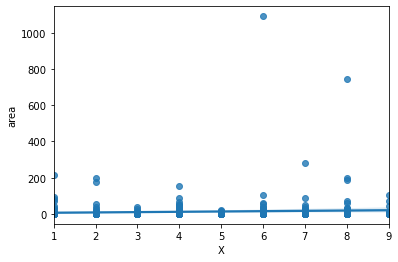

In [62]:
def answer_10(): 
    # write your code here
    ax = sns.regplot(x="X", y="area", data=data_fire)
    return ax
answer_10()

In [37]:
spearmanr(data_fire['area'],data_fire['X'])

SpearmanrResult(correlation=0.06049949581719138, pvalue=0.1695832499545612)

<AxesSubplot:xlabel='Y', ylabel='area'>

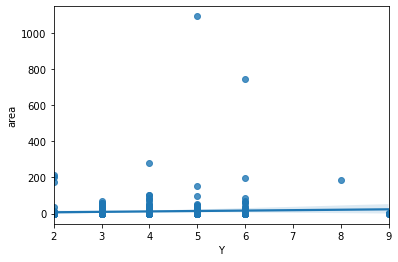

In [38]:
def answer_11(): 
    # write your code here
    ax = sns.regplot(x="Y", y="area", data=data_fire)
    return ax
answer_11()

In [39]:
spearmanr(data_fire['area'],data_fire['Y'])

SpearmanrResult(correlation=0.04601783736703924, pvalue=0.2963200551775709)

#  Some visualization
He we start a visualisation of the data set based on histogram, correlation matrix and scater plots. 
It's helpful to have a better understand about the mean of the variables, distribution, correlation, etc. 

>HISTOGRAM FOR BINS ( VARIABLE AREA) 

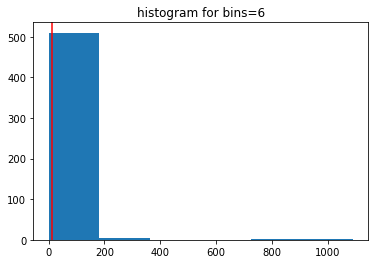

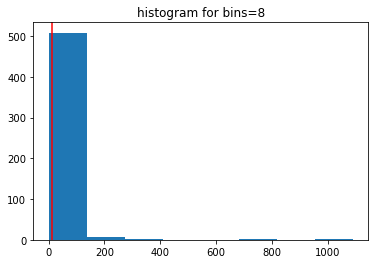

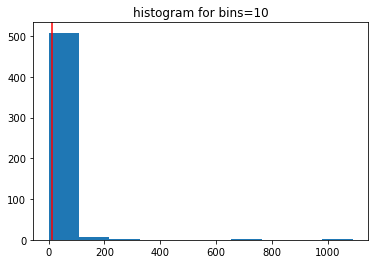

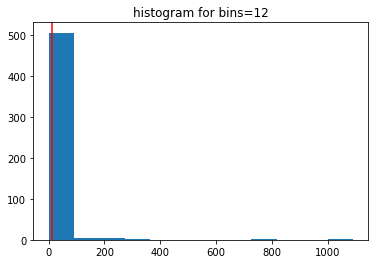

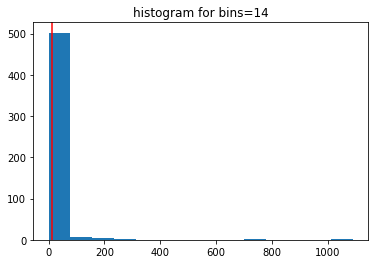

In [299]:
#in histograms, "bin" parameter is set to 10 by default
# bin defines the number of equal-width bins in the range.
def answer_12():
    for i in range(6,16,2):
        plt.figure()
        plt.hist(x='area',data=data_fire,bins=i)
        plt.axvline(data_fire['area'].mean(),color='red') # add the mean value of tip to our plots
        plt.title('histogram for bins='+str(i))
answer_12()

area_array = np.array(data_fire['area'])
normalized_area_array = preprocessing.normalize([area_array])


> HISTOGRAM FOR ALL NUMERICAL VARIABLES 

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

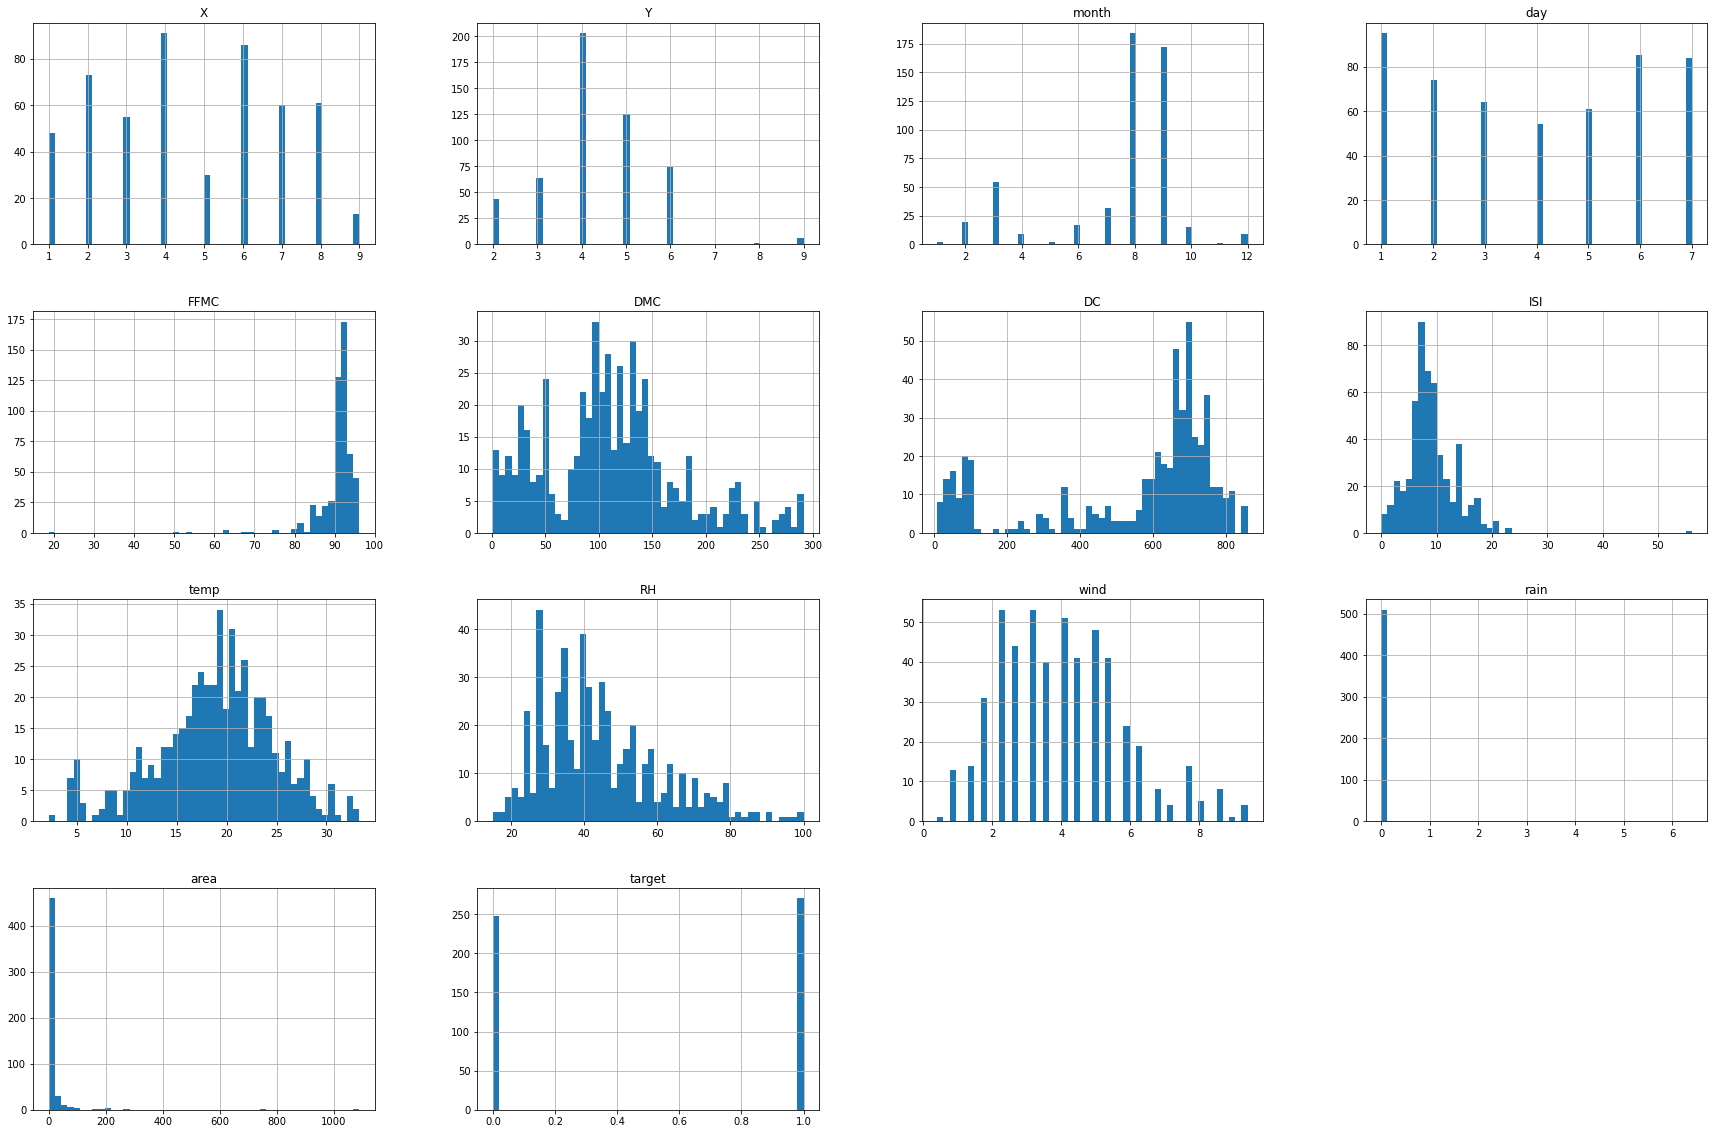

In [300]:
# histogram variables: total bill, tip, size and tip_rate 
data_fire.hist(bins=50, figsize=(30,20))

> SCATTER PLOT FOR VARIABLE AREA: the graphs increase the size to see the affect of area over the datapoints

<AxesSubplot:xlabel='X', ylabel='Y'>

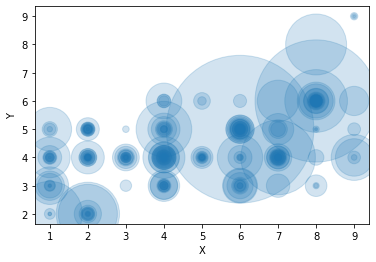

In [301]:
# plotting 
data_fire.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*data_fire['area'])

> GRAFICAL CORRELATION ANALYSES:Let's now explore the relationship between our variables by plotting the Pearson Correlation between all the attributes in our dataset

In [29]:
# BEFORE TO RUN WE NEED TO REMOVE ALL THE CATEGORICAL VARIABLES. 
# drop AREA CATEGORY 
data_fire = data_fire.drop('area_category', 1)

In [30]:
# BEFORE TO RUN WE NEED TO REMOVE ALL THE CATEGORICAL VARIABLES. 
# drop TEMP CATEGORY 
data_fire = data_fire.drop('temp_category', 1)


In [306]:
data_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


> CORRELATION MATRIX 

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

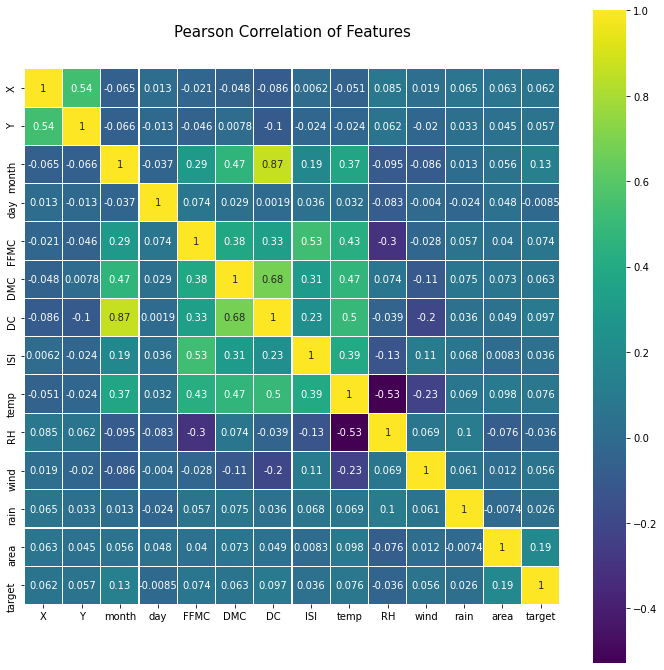

In [304]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_fire.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

> CORRELATION BETWEEN SOME VARIABLES  :
Different that we calculated above ( area x some variables) , here we see the correlation between some variables.
It can be good to see some relevants variables and if some of then are 'redundants'. Follow  some conclusion:

>> TEMP X RH : strong negative correlation .
>> DC X DMC :  positive correlation .
>> ISS X TEMP : positive correlation .
>> DMC X TEMP: strong correlation


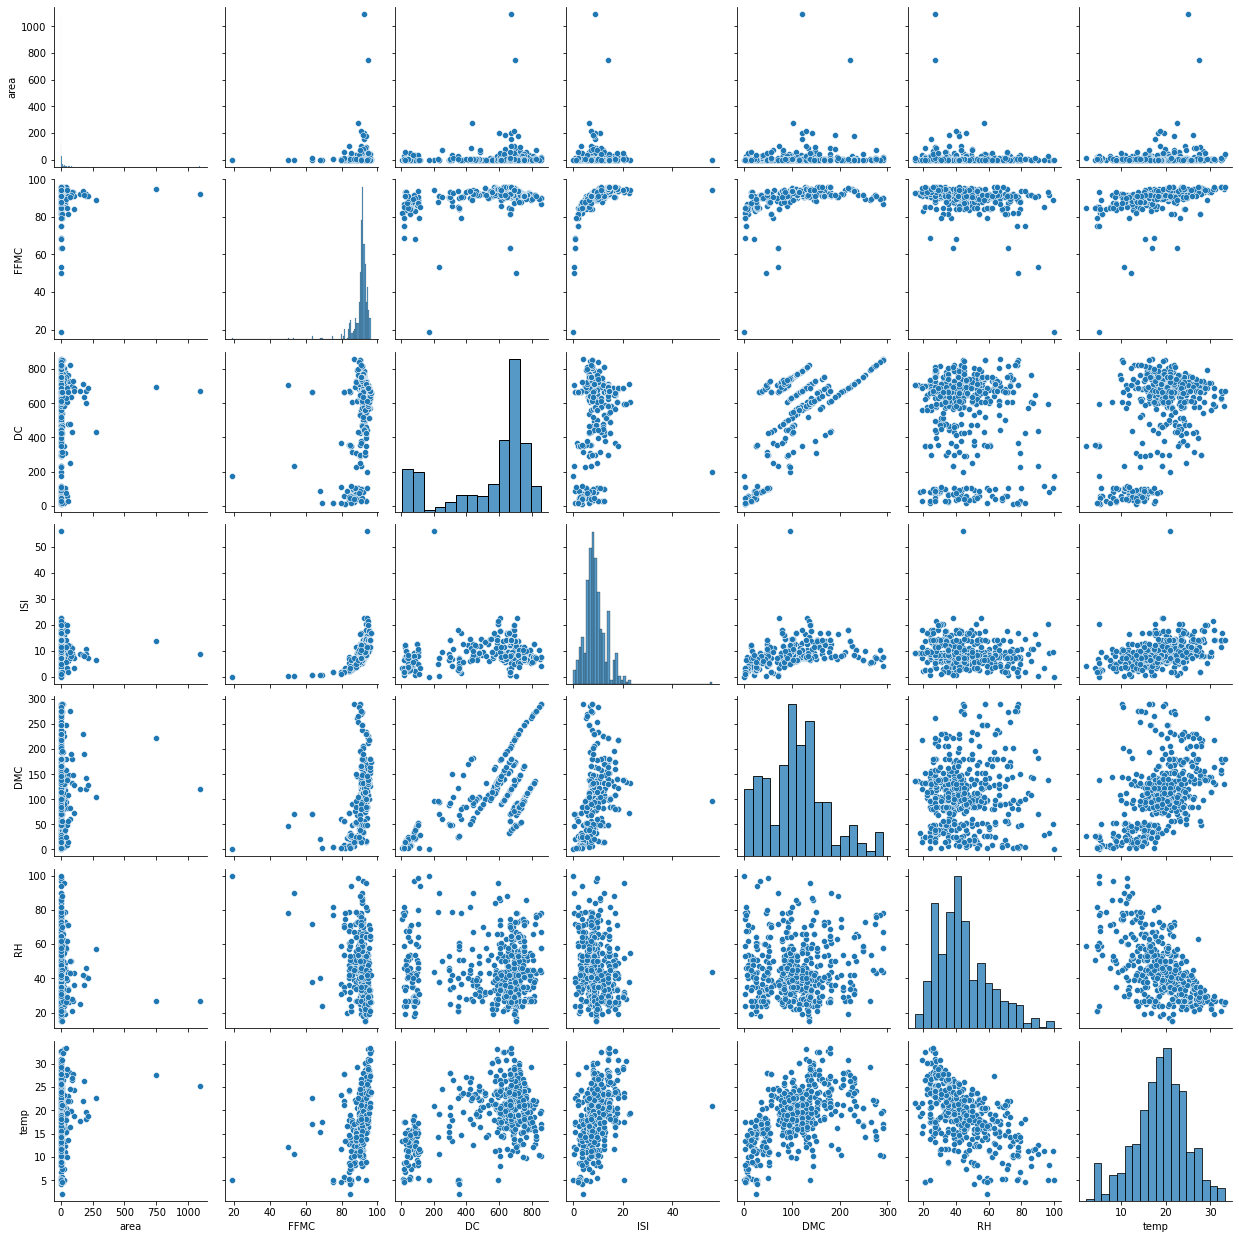

In [308]:
#visualizing relations of most related attributes
attributes = ['area', 'FFMC','DC','ISI','DMC', 'RH','temp']
sns.pairplot(data_fire[attributes])
plt.show()

# B. Un-supervised Learning: Clustering

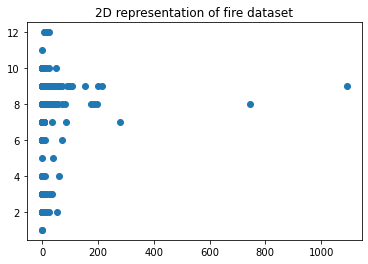

In [309]:
# Representation of the dataset
plt.title('2D representation of fire dataset')
plt.scatter(data_fire['area'],data_fire['month'])


In [310]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(data_fire) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(data_fire, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.7258967920728917
For n = 3 Silhouette_score: 0.6112062427604364
For n = 4 Silhouette_score: 0.6236154324971805
For n = 5 Silhouette_score: 0.41555369836949535
For n = 6 Silhouette_score: 0.4572124493964215
For n = 7 Silhouette_score: 0.44627382235494273
For n = 8 Silhouette_score: 0.41514470680789894
For n = 9 Silhouette_score: 0.44213656581296384
For n = 10 Silhouette_score: 0.45686869735745517



>> REMARK: 
n=2 seems to be the best solution, but the silhouette scores for different number of clusters are close to each other. Probably in this case, K-means does not work well.

In [317]:
# We will now perform hierarchical clustering.  

# We standardize the columns of interest: necessary for hierarchical clustering
## all variables will now have the same scale, i.e. same values ranges
fire_scaled=pd.DataFrame(scale(data_fire),columns=data_fire.columns,index=data_fire.index)  # scale(food) returns a numpy array, so use pd.Dataframe to reconstruct your dataframe
print("We standardize the columns ")
print(fire_scaled)


# We apply hierarchical clustering with dissimilarity measure  "ward" ( it is the linkage method)
Z = linkage(fire_scaled, 'ward') #  Metric (distance measure) is "euclidian" by default
##Learn more about it here 
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html 
## scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False

print("--------------------------------------------------------")
print("Results of hierarchical clustering")
print("How to read the first line :: instances 0 and  10 have distance   0.06973555  and are grouped together in a cluster composed of two instances 2. ")

print(Z)

We standardize the columns 
            X         Y     month       day      FFMC       DMC        DC  \
0    1.008313  0.569860 -1.968443  0.946441 -0.805959 -1.323326 -1.830477   
1    1.008313 -0.244001  1.110120 -0.454255 -0.008102 -1.179541  0.488891   
2    1.008313 -0.244001  1.110120  1.413339 -0.008102 -1.049822  0.560715   
3    1.440925  1.383722 -1.968443  0.946441  0.191362 -1.212361 -1.898266   
4    1.440925  1.383722 -1.968443 -1.388053 -0.243833 -0.931043 -1.798600   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.289524 -1.057862  0.230531 -1.388053 -1.640083 -0.846648  0.474768   
513 -1.154748 -0.244001  0.230531 -1.388053 -1.640083 -0.846648  0.474768   
514  1.008313 -0.244001  0.230531 -1.388053 -1.640083 -0.846648  0.474768   
515 -1.587360 -0.244001  0.230531  1.413339  0.680957  0.549003  0.269382   
516  0.575701 -1.057862  1.549915 -0.454255 -2.020879 -1.685913 -1.780442   

          ISI      temp        RH      wind    

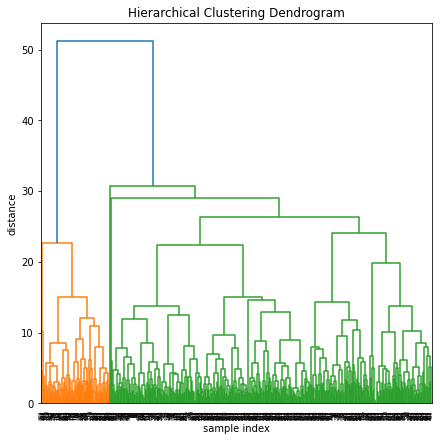

In [318]:
# We represent the corresponding Dendrogram
plt.figure(figsize=(7, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = linkage(fire_scaled, 'ward')
)
plt.show()

In [381]:
# In this part, we were clusterized the coordinates.
data_fire_coordinates = data_fire.loc[:, ["X", "Y"]]
coordinates = data_fire_coordinates.values
coordinates


array([[7, 5],
       [7, 4],
       [7, 4],
       ...,
       [7, 4],
       [1, 4],
       [6, 3]], dtype=int64)

> To finding number of cluster, now we use elbow method. To perform the elbow method, we run several k-means, increment k with each iteration, and record the WCSS. When we plot WCSS as a function of the number of clusters, notice that WCSS continues to decrease as we increase k.

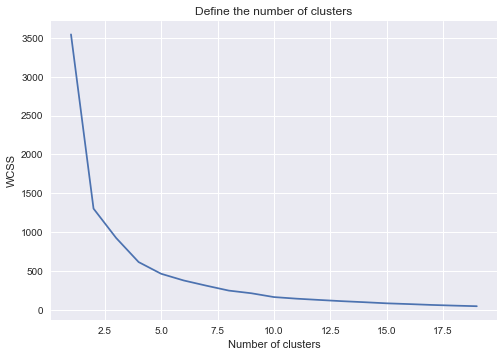

In [382]:
#find the number of cluster using elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, 
                    n_init = 10, random_state = 0)
    #max_iter - max number of iteration to define the final clusers
    #n_init - number of k_means algorithm running
    kmeans.fit(coordinates)
    wcss.append(kmeans.inertia_)
    #inertia_ Sum of squared distances of samples to their closest cluster center.
plt.plot(range(1, 20), wcss)
plt.title('Define the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

> There’s a sweet spot where the WCSS curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=5. So cluster number = 5 will be a good option.

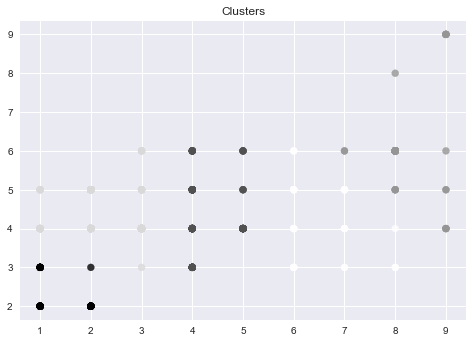

[[6.44594595 4.24324324]
 [2.29752066 4.31404959]
 [8.15277778 6.08333333]
 [4.24793388 4.24793388]
 [1.47272727 2.2       ]]

Calculating distance between clusters

[[0.         4.14902951 2.50982199 2.19801707 5.3765925 ]
 [4.14902951 0.         6.11673122 1.95153351 2.26924873]
 [2.50982199 6.11673122 0.         4.31468388 7.72679445]
 [2.19801707 1.95153351 4.31468388 0.         3.44902956]
 [5.3765925  2.26924873 7.72679445 3.44902956 0.        ]]


In [385]:
#so cluster number 5 is a good option
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
plt.figure()
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, 
                    n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(coordinates)
data_fire["Cluster"]= clusters
plt.subplot()
plt.scatter(data_fire['X'].values, data_fire['Y'].values, marker='o', c=clusters, alpha=0.8)
plt.title("Clusters")
plt.show()
centroids = kmeans.cluster_centers_
print(centroids)
print("\nCalculating distance between clusters\n")
print(euclidean_distances(centroids,centroids))

> CLUSTER CORRELATIONS 

In [387]:
#function to create cluster Correlation 
import seaborn as sns
import numpy as np
def build_cluster_corr(data_fire_cluster):
    data_fire_cluster_indicators = data_fire_cluster.loc[:, ["area","FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]]
    plt.clf()
    plt.figure(figsize=(10,10))
    cmap = sns.diverging_palette(20, h_pos=220, s=75, l=50, sep=10, center='light', as_cmap=True)     
    corr_matrix = data_fire_cluster_indicators.corr()
    corr_matrix[np.abs(corr_matrix) < 0.65] = 0
    sns.heatmap(corr_matrix, cmap=cmap, annot=True)     
    plt.show()

In [388]:
#cluster 0
data_fire_cluster0 = data_fire[(data_fire["Cluster"] == 0)] 
data_fire_cluster0.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Cluster
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0
10,7,5,9,7,92.5,88.0,698.6,7.1,17.8,51,7.2,0.0,0.0,0


<Figure size 576x396 with 0 Axes>

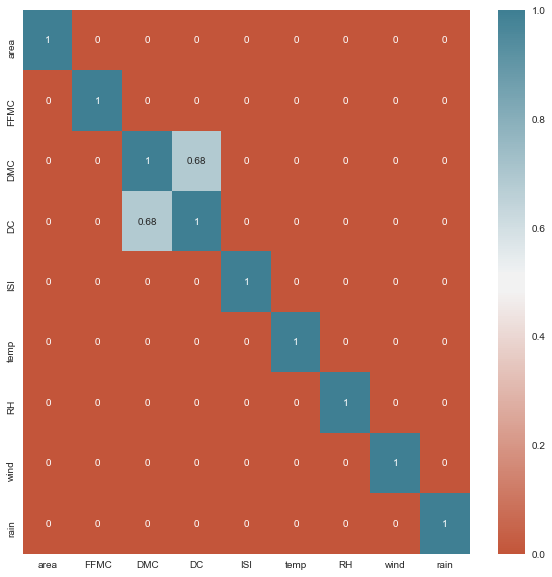

In [390]:
build_cluster_corr(data_fire_cluster0)

> NOTE: Each cell in the grid represents the value of the correlation coefficient between two variables. There is a color bar. In this bar (O.O) position is the negative Correlation.In the bar middle position white color there is no correlation. Upper position of the bar (1.0)lite blue is positive correlation.
In first clustering, we can see that DC and DMC has slightly positive correlation between them which value is 0.68. When DC increases that time DMC also will increase.

<Figure size 576x396 with 0 Axes>

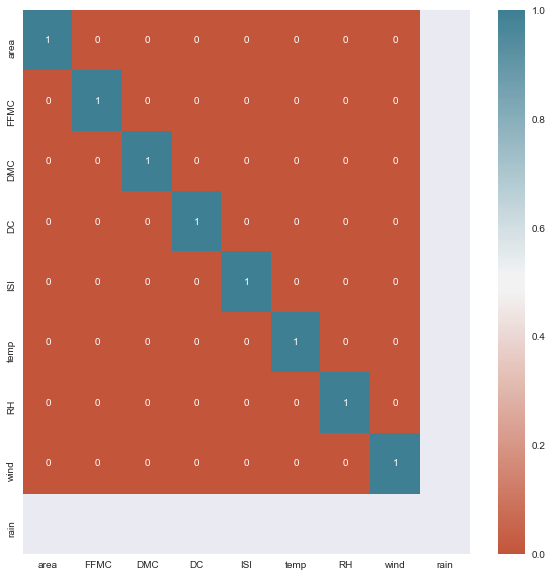

In [391]:
data_fire_cluster1 = data_fire[(data_fire["Cluster"] == 1)] 
data_fire_cluster1.head()
build_cluster_corr(data_fire_cluster1)

> NOTE: In the second clustering, we can see that there is no positive correlation between all the attribute.

<Figure size 576x396 with 0 Axes>

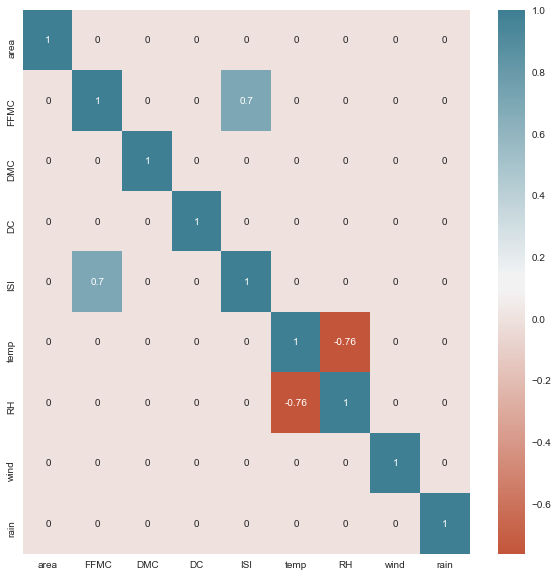

In [394]:
data_fire_cluster2 = data_fire[(data_fire["Cluster"] == 2)] 
data_fire_cluster2.head()
build_cluster_corr(data_fire_cluster2)

>NOTE: In the third clustering, there is slightly positive correlation between ISI and FFMC which value is 0.7. That means when ISI increases that time FFMC will increase. And there is negative correlation between RH, temp which value is -0.76. It means that if RH increases that time temp will decrease.

<Figure size 576x396 with 0 Axes>

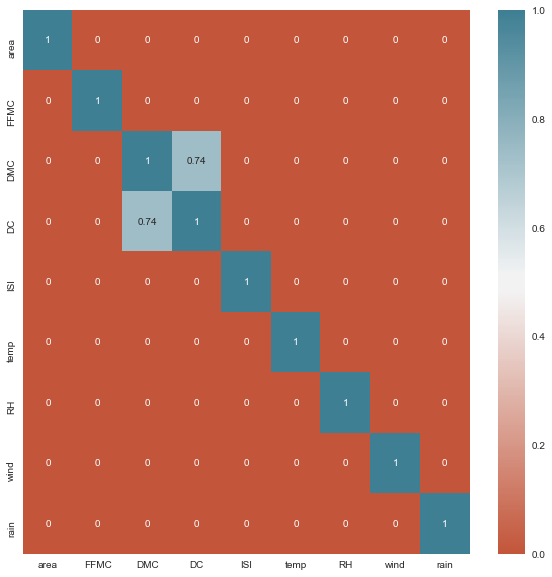

In [396]:
data_fire_cluster3 = data_fire[(data_fire["Cluster"] == 3)] 
data_fire_cluster3.head()
build_cluster_corr(data_fire_cluster3)

> NOTE :In this clustering, we can see that DC and DMC has slightly positive correlation between them which value is 0.74. When DC increases that time DMC also will increase.

<Figure size 576x396 with 0 Axes>

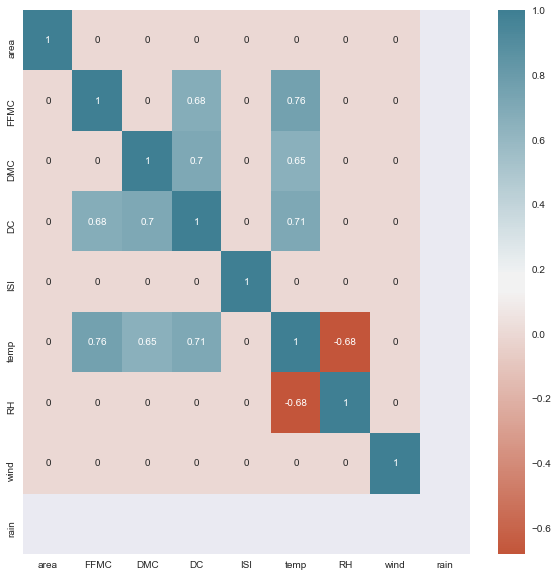

In [397]:
data_fire_cluster4 = data_fire[(data_fire["Cluster"] == 4)] 
data_fire_cluster4.head()
build_cluster_corr(data_fire_cluster4)

> In last clustering, we can see that RH and temp has negative correlation between them which value is -0.68. It means that When RH increases that time temp also will decrease. There are slightly positive correlation between temp, DMC and DC, FFMC. Temp and FFMC has stronger then positive correlation. It means that Temp increases that time FFMC will increase.

> Finally we can say that forest fires occurrence depend on temporal and spatial dimenstion.

# C. Supervised Learning: Regression problem formulation - part 1 

> Our target variable among the current variables is "area". Based on the informations that we have , we decided to fit some models in order to predict the burned area of the forest.

> In this step we will fit "OLS MODELs" .


In [319]:
data_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


> MODEL WITH ALL THE VARIABLES :

In [320]:
def answer_14():
    model=sm.ols(formula="data_fire.area~data_fire.X +data_fire.Y+ data_fire.month+data_fire.day +data_fire.FFMC +data_fire.DMC +data_fire.DC +data_fire.ISI +data_fire.temp +data_fire.RH +data_fire.wind+data_fire.rain",data=data_fire).fit()
    return model.summary()
answer_14()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         data_fire.area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.092
Date:                Thu, 29 Apr 2021   Prob (F-statistic):              0.364
Time:                        19:50:15   Log-Likelihood:                -2873.8
No. Observations:                 517   AIC:                             5774.
Df Residuals:                     504   BIC:                             5829.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -16.1538     63.420     -0.255      0.799    -140.755     108.447
data_fire.X         1.9002      1.450      1.311      0.191      -0.948       4.748
data_fire.Y         0.3241      2.754      0.118      0.906      -5.086       5.734
data_fire.month     2.9004      2.791      1.039      0.299      -2.583       8.384
data_fire.day       1.3269      1.320      1.005      0.315      -1.267       3.921
data_fire.FFMC     -0.1127      0.663     -0.170      0.865      -1.415       1.190
data_fire.DMC       0.0966      0.071      1.369      0.172      -0.042       0.235
data_fire.DC       -0.0315      0.032     -0.981      0.327      -0.095       0.032
data_fire.ISI      -0.7305      0.772     -0.947      0.344      -2.247       0.786
data_fire.temp      0.9546      0.797      1.198      0.232      -0.612       2.521
data_fire.RH       -0.1758      0.241     -0.730      0.466      -0.649       0.297
data_fire.wind      1.2321      1.702      0.724      0.470      -2.113       4.577
data_fire.rain     -3.1958      9.683     -0.330      0.742     -22.220      15.829
==============================================================================
Omnibus:                      972.663   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           769640.593
Skew:                          12.508   Prob(JB):                         0.00
Kurtosis:                     190.356   Cond. No.                     1.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> NOTE:  Our ols model explains 2.5% of the change in our ‘area’ variable.  

> MODEL JUST WITH SOME VARIABLES : We decided to test the model with some variables to see how much the model can bee explained by them.

In [330]:
def answer_13():
    model=sm.ols(formula="data_fire.area~data_fire.X +data_fire.Y",data=data_fire).fit()
    return model.summary()
answer_13()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         data_fire.area   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.078
Date:                Thu, 29 Apr 2021   Prob (F-statistic):              0.341
Time:                        20:02:46   Log-Likelihood:                -2879.4
No. Observations:                 517   AIC:                             5765.
Df Residuals:                     514   BIC:                             5777.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.3976     10.197      0.235      0.814     -17.635      22.431
data_fire.X     1.5203      1.438      1.057      0.291      -1.305       4.346
data_fire.Y     0.7793      2.706      0.288      0.773      -4.536       6.095
==============================================================================
Omnibus:                      981.336   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           801328.068
Skew:                          12.744   Prob(JB):                         0.00
Kurtosis:                     194.179   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [325]:
def answer_15():
    model=sm.ols(formula="data_fire.area~ data_fire.month+data_fire.day ",data=data_fire).fit()
    return model.summary()
answer_15()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         data_fire.area   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.485
Date:                Thu, 29 Apr 2021   Prob (F-statistic):              0.228
Time:                        19:58:34   Log-Likelihood:                -2879.0
No. Observations:                 517   AIC:                             5764.
Df Residuals:                     514   BIC:                             5777.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.3240     11.092     -0.480      0.631     -27.116      16.468
data_fire.month     1.6331      1.231      1.327      0.185      -0.785       4.051
data_fire.day       1.5008      1.307      1.148      0.251      -1.067       4.068
==============================================================================
Omnibus:                      979.671   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           790689.681
Skew:                          12.701   Prob(JB):                         0.00
Kurtosis:                     192.894   Cond. No.                         35.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
def answer_17():
    model=sm.ols(formula="data_fire.area~data_fire.FFMC +data_fire.DMC +data_fire.DC +data_fire.ISI",data=data_fire).fit()
    return model.summary()
answer_17()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         data_fire.area   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7820
Date:                Thu, 29 Apr 2021   Prob (F-statistic):              0.537
Time:                        19:59:41   Log-Likelihood:                -2878.9
No. Observations:                 517   AIC:                             5768.
Df Residuals:                     512   BIC:                             5789.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -20.7883     52.463     -0.396      0.692    -123.857      82.281
data_fire.FFMC     0.3268      0.627      0.521      0.602      -0.905       1.558
data_fire.DMC      0.0726      0.062      1.173      0.241      -0.049       0.194
data_fire.DC      -0.0009      0.016     -0.055      0.956      -0.031       0.030
data_fire.ISI     -0.3957      0.733     -0.540      0.589      -1.835       1.044
==============================================================================
Omnibus:                      982.838   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           811286.526
Skew:                          12.781   Prob(JB):                         0.00
Kurtosis:                     195.374   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [329]:
def answer_18():
    model=sm.ols(formula="data_fire.area~data_fire.temp",data=data_fire).fit()
    return model.summary()
answer_18()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         data_fire.area   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.978
Date:                Thu, 29 Apr 2021   Prob (F-statistic):             0.0261
Time:                        20:00:15   Log-Likelihood:                -2878.0
No. Observations:                 517   AIC:                             5760.
Df Residuals:                     515   BIC:                             5768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.4138      9.500     -0.780      0.435     -26.077      11.249
data_fire.temp     1.0726      0.481      2.231      0.026       0.128       2.017
==============================================================================
Omnibus:                      979.270   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           793772.021
Skew:                          12.687   Prob(JB):                         0.00
Kurtosis:                     193.275   Cond. No.                         67.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
def answer_19():
    model=sm.ols(formula="data_fire.area~ data_fire.month",data=data_fire).fit()
    return model.summary()
answer_19()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       data_fire.target   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     8.899
Date:                Thu, 29 Apr 2021   Prob (F-statistic):            0.00299
Time:                        17:36:48   Log-Likelihood:                -370.29
No. Observations:                 517   AIC:                             744.6
Df Residuals:                     515   BIC:                             753.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3082      0.075      4.110      0.000       0.161       0.456
data_fire.month     0.0286      0.010      2.983      0.003       0.010       0.047
==============================================================================
Omnibus:                     2238.610   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.516
Skew:                          -0.091   Prob(JB):                     3.28e-18
Kurtosis:                       1.075   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [407]:
def answer_20():
    model=sm.ols(formula="data_fire.area~ data_fire.month+data_fire.temp",data=data_fire).fit()
    return model.summary()
answer_20()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         data_fire.area   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.611
Date:                Thu, 29 Apr 2021   Prob (F-statistic):             0.0745
Time:                        21:59:26   Log-Likelihood:                -2877.8
No. Observations:                 517   AIC:                             5762.
Df Residuals:                     514   BIC:                             5774.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.5484     11.386     -0.926      0.355     -32.917      11.820
data_fire.month     0.6606      1.321      0.500      0.617      -1.934       3.255
data_fire.temp      0.9771      0.518      1.888      0.060      -0.040       1.994
==============================================================================
Omnibus:                      979.364   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           793995.688
Skew:                          12.690   Prob(JB):                         0.00
Kurtosis:                     193.301   Cond. No.                         86.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) Rsquared:mearure how dispersed the data is around our fit , so it dive us a good idea how the regression model is performing 


>NOTES MODEL WITH SOME VARIABLES  :

>X and Y : They explain 0.4 % of the model; 

>MES and DAY : They explain 0.6 % of the model;

>FFMC,DMC,DC and ISI: explain 0.6 % of the model;

>TEMP:  explain   1 % of the model;

>MONTH :explain   1.7 % of the model;  

> TEMP and MONTH are good R-squared compared with some other variables analysed. its because of it we tested a model just with them.but when we do it we don't find significant result. 

# Defining Taks ( classification, regression), split and normalizing our data 


In [31]:
#excluindo variavel target. We first constructed this variable with thinking to create a target(0 or 1), but we do it in the next 
#step directly inside the code. If we continue with this variable in the analyse, we have a baised result. 
data_fire = data_fire.drop('target', 1)


In [343]:
data_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


> # NOTE: 
 
> Because the data will gone be treated as a 'regression' and 'classification' test, we will create a 'task'
where, if task is equal to 'regression' then the output variable is 'area'.
if task is equal to 'classification' is going to take the area column and apply a function  to it. 
We create a variable 'x' equal to '1' when area is bigger then zero and 0 , otherwise.  
Certain models preffer to work with scaled data. Knowing that, each variable takes varios varing range of values standart the datas gives to all variables the same range of values, giving a mean equal to 0 and a variance equal to 1 for each column(variable) present in the data frame.In our project we do it using the 'StandardScaler'.
In addition, in this step we define our X_train, X_test, y_train, y_test  and after we split then (70 % for train , 30 % for test). Where: 




In [32]:
def preprocess_inputs(data_fire, task='regression'):
    data_fire = data_fire.copy()
    
   # Split df into X and y
    if task == 'regression':
        y = data_fire['area']
    elif task == 'classification':
        y = data_fire['area'].apply(lambda x: 1 if x > 0 else 0)   
    X = data_fire.drop('area', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale feature data (X)
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

#  C. Supervised Learning: Regression problem formulation - part 2


In [476]:
X_train, X_test, y_train, y_test = preprocess_inputs(data_fire, task='regression')

In [477]:
y_train

13       0.00
61       0.00
453      0.00
39       0.00
373      0.00
        ...  
129      0.00
144      0.77
72       0.00
235    196.48
37       0.00
Name: area, Length: 361, dtype: float64

> In this step we will handle with a classification problem and fit "LINEAR REGRESSION" and" NN REGRESSION" .

>TEST 1) LINEAR REGRESSION 

In [478]:
# linear regression model evaluation on the 'test' set .
# we fit this to the train set we pass in the 'test' set it's going to make predictions on x_test compare then to y test  and calculate the R squared.

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

print("Linear Regression R^2: {:.2f}%".format(lin_reg_model.score(X_test, y_test)* 100))




Linear Regression R^2: 2.03%


> TEST 2 ) NN REGRESSION : 

As the result of the linear regression is not so good (2.1%) , we will test a neural network complex model  ' MLPRegressor'. With neural network we get different results at each time of execution. however, its better then when we fit using Linear regression.  

In [479]:
nn_reg_model = MLPRegressor(hidden_layer_sizes=(16, 16)) #16 neurons in each layer
nn_reg_model.fit(X_train, y_train)

print("NN Regression R^2: {:.2f}%".format(nn_reg_model.score(X_test, y_test)* 100))

NN Regression R^2: 2.75%


> TEST 3) DECISION TREE REGRESSOR  

In [480]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [481]:
y_pred = regressor.predict(X_test)


In [485]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 25.035128205128203
Root Mean Squared Error: 68.80294596219643


>> NOTES:
Using the "linear regression" we can see that the variables can explain  2.1% of the model. Otherwise, run "NN Regression" we can see that the variables explain 3.5% of the model.In this case, NN regression perform better than Linear Regression model.  In addition, when we fit the "Decision Tree Regressor" we can see that the mean absolute error for our algorithm is 25.04%, what means that our algorithm did a fine prediction job.

# D. Supervised Learning: Classification problem formulation

>> Here we use the task "classification" where  y becomes a  target variable (0 or 1). In this step we will handle with a  classification problem and fit "DECISION TREE CLASSIFIER","K -NEAREST NEIGHBORS","LOGISTIC REGRESSION","NEURAL NETWORK CLASSIFIER" and "DUMMY CLASSIFIER".

In [33]:
X_train, X_test, y_train, y_test = preprocess_inputs(data_fire, task='classification')

In [475]:
y_train


13     0
61     0
453    0
39     0
373    0
      ..
129    0
144    1
72     0
235    1
37     0
Name: area, Length: 361, dtype: int64

> TEST 1) DECISION TREE CLASSIFIER    


BUILDING


In [430]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [431]:
# Evaluates the training onto the test set
clf.fit(X_train,y_train)
clf.score(X_test,y_test) 

0.5256410256410257

EVALUATION  
> Let's estimate, how accurately the classifier can predict the fire area. Accuracy can be computed by comparing actual test set values and predicted values.

In [436]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics


print("Accuracy:{:.2f}%".format(metrics.accuracy_score(y_test, y_pred)* 100))


Accuracy:51.28%


In [451]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [453]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35 40]
 [35 46]]
              precision    recall  f1-score   support

           0       0.50      0.47      0.48        75
           1       0.53      0.57      0.55        81

    accuracy                           0.52       156
   macro avg       0.52      0.52      0.52       156
weighted avg       0.52      0.52      0.52       156



NOTE: From the confusion matrix, you can see  52 % accuracy. 

> TESTE 2 ) K -NEAREST NEIGHBORS : one of the simplest classification algorithms ; this algorithm helps grouping similar data points together according to their proximity

In [440]:
# Comparison with K-nearest neighbors classifier (= most common class algorithm)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print("K-nearest neighbors:{:.2f}%".format(neigh.score(X_test,y_test) * 100))

K-nearest neighbors:53.21%


> TESTE 3 ) LOGISTIC REGRESSION    



In [441]:
lin_clf_model = LogisticRegression()
lin_clf_model.fit(X_train, y_train)

print("Linear Classification Accuracy: {:.2f}%".format(lin_clf_model.score(X_test, y_test) * 100))


Linear Classification Accuracy: 50.64%


> TESTE 4 ) NEURAL NETWORK CLASSIFIER : MLPClassifier relies on an underlying Neural Network to perform the task of classification

In [445]:
nn_clf_model = MLPClassifier(hidden_layer_sizes=(16, 16))
nn_clf_model.fit(X_train, y_train)

print("NN Classification Accuracy: {:.2f}%".format(nn_clf_model.score(X_test, y_test) * 100))


NN Classification Accuracy: 53.85%


> TESTE 5 ) DUMMY CLASSIFIER

In [50]:
# Comparison with Dummy classifier
Dum = DummyClassifier()
Dum.fit(X_train,y_train)
Dum.score(X_test,y_test)
print("Dummy classifier:{:.2f}%".format(Dum.score(X_test,y_test)* 100))

Dummy classifier:48.72%


 >> NOTES: We can see that between the machine learning methods tested in this part, "Neural Network" and " K-nearest neighbors classifier" (53.8% and 53.2%, respectively) are providing better accuracies . After that, "Decision Tree Classifier" gives to us the 3° better accuracy of 51.28% . However, "Dummy and "Logistic" dont  presented good accuracy, been 48.1% and 50.64%.
From this outcome by "Neural Network" and " K-nearest neighbors classifier", we can then take this data and start working with these 2 models to see how we might be able to optimize the modeling process to see if one model works a bit better than others.

the model can be adjusted and tuned again to improve the accuracy.


[Text(135.2959728936464, 292.185, 'X[6] <= -1.122\ngini = 0.499\nsamples = 361\nvalue = [172, 189]'),
 Text(44.39337016574585, 278.595, 'X[12] <= -0.833\ngini = 0.434\nsamples = 69\nvalue = [47, 22]'),
 Text(19.73038674033149, 265.005, 'X[8] <= -0.929\ngini = 0.497\nsamples = 24\nvalue = [11, 13]'),
 Text(9.865193370165745, 251.41500000000002, 'X[6] <= -1.803\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(4.932596685082872, 237.82500000000002, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(14.797790055248617, 237.82500000000002, 'X[7] <= -0.03\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(9.865193370165745, 224.235, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(19.73038674033149, 224.235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(29.595580110497234, 251.41500000000002, 'X[5] <= -1.107\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(24.66298342541436, 237.82500000000002, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(34.52817679558011, 237.82500000000

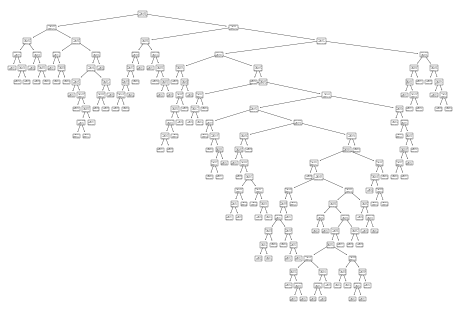

In [489]:
tree.plot_tree(clf) 

>Resume about the models:

>regression algorithm: can predict a discrete value which is in the form of an integer quantity.

>classification algorithm: can predict a continuous value if it is in the form of a class label probability.

>K-nearest neighbor: His algorithm helps grouping similar data points together according to their proximity.

>Decision tree classification :In this algorithm, a classification model is created by building a decision tree where every node of the tree is a test case for an attribute and each branch coming from the node is a possible value for that attribute.
It breaks down a dataset into smaller and smaller subsets based on different criteria

>Simple linear regression : you can estimate the relationship between one independent variable and another dependent variable using a straight line.

>Logistic regression algorithm: instead of predicting the actual continuous value, we predict the probability of an outcome. To achieve this, a logistic function is applied to the outcome of the linear regression

>MLPClassifier : it relies on an underlying Neural Network to perform the task of classification
